In [276]:
from PIL import Image
import numpy as np
from skimage.exposure import equalize_hist
from skimage.measure import compare_psnr
from skimage.feature import canny
import rasterio
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.filters import gaussian, laplace, roberts, prewitt, sobel
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics.pairwise import chi2_kernel
%matplotlib inline

In [235]:
edges = rasterio.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/edges.tif').read(1)
crops = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/crops.tif'))

band_01 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_01.tif'))
band_02 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_02.tif'))
band_03 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_03.tif'))
band_04 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_04.tif'))
band_05 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_05.tif'))
band_06 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_06.tif'))
band_07 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_07.tif'))
band_08 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_08.tif'))
band_8A = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_8A.tif'))
band_09 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_09.tif'))
band_10 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_10.tif'))
band_11 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_11.tif'))
band_12 = np.array(Image.open('/Users/vasilii/Downloads/Telegram Desktop/Desktop/band_12.tif'))

In [236]:
band_01 = equalize_hist(band_01)
band_02 = equalize_hist(band_02)
band_03 = equalize_hist(band_03)
band_04 = equalize_hist(band_04)
band_05 = equalize_hist(band_05)
band_06 = equalize_hist(band_06)
band_07 = equalize_hist(band_07)
band_08 = equalize_hist(band_08)
band_8A = equalize_hist(band_8A)
band_09 = equalize_hist(band_09)
band_10 = equalize_hist(band_10)
band_11 = equalize_hist(band_11)
band_12 = equalize_hist(band_12)

In [238]:
bands = np.array([band_01, band_02, band_03, band_04, band_05, band_06, band_07, band_08, band_09,
                 band_10, band_11, band_12])

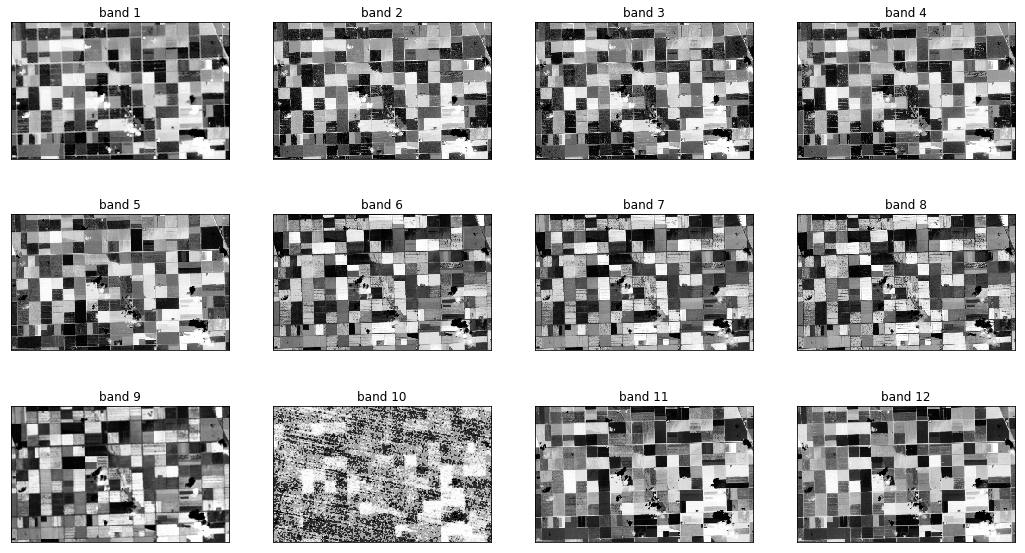

In [247]:
plt.figure(figsize=(18,10))
for i, band in enumerate(bands):
    plt.subplot(3,4,i+1)
    plt.imshow(band, cmap='gray')
    plt.title('band '+str(i+1))
    plt.xticks([])
    plt.yticks([])

In [22]:
def show_edges(edges):
    plt.figure(figsize=(18,12))
    plt.imshow(edges, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    
def show_data(data):
    plt.figure(figsize=(18,12))
    plt.imshow(data)
    plt.xticks([])
    plt.yticks([])
    plt.show()

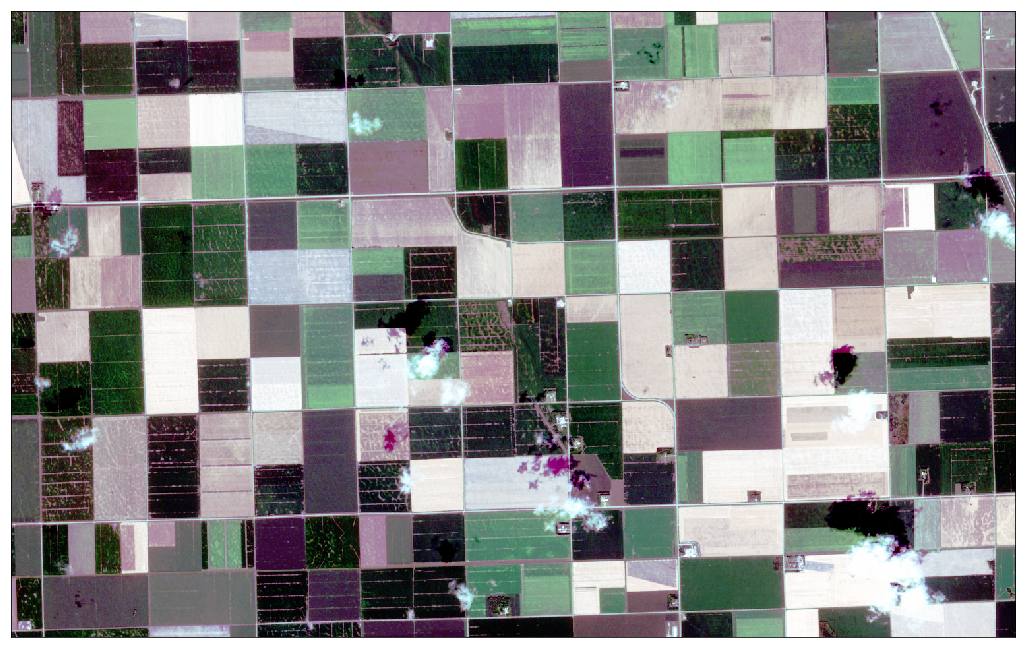

In [23]:
show_data(np.dstack([band_04, band_03, band_02]))

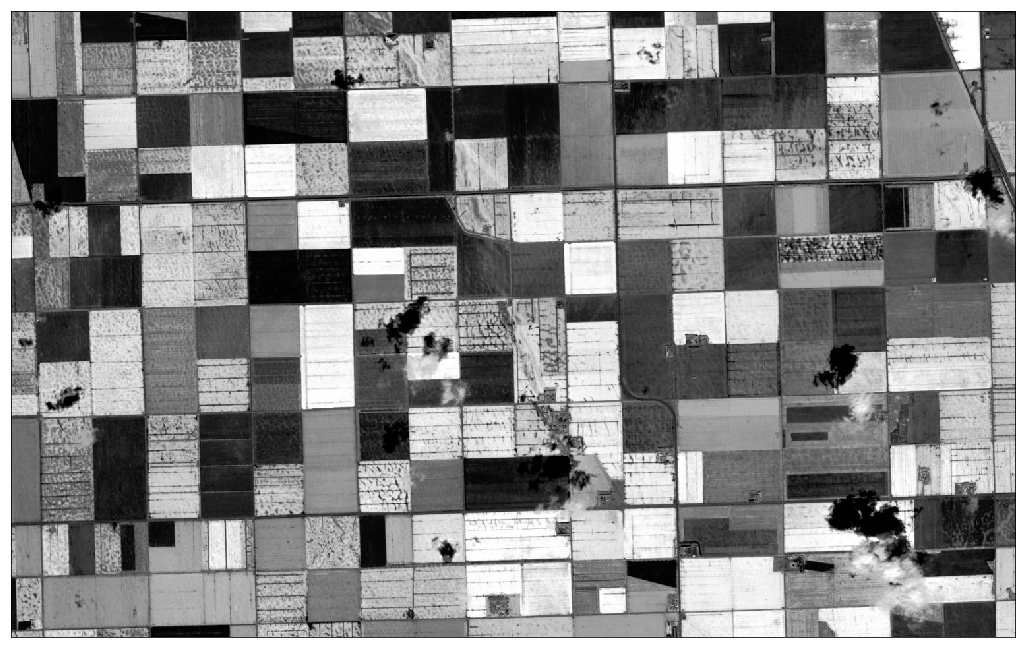

In [66]:
show_edges(band_08)

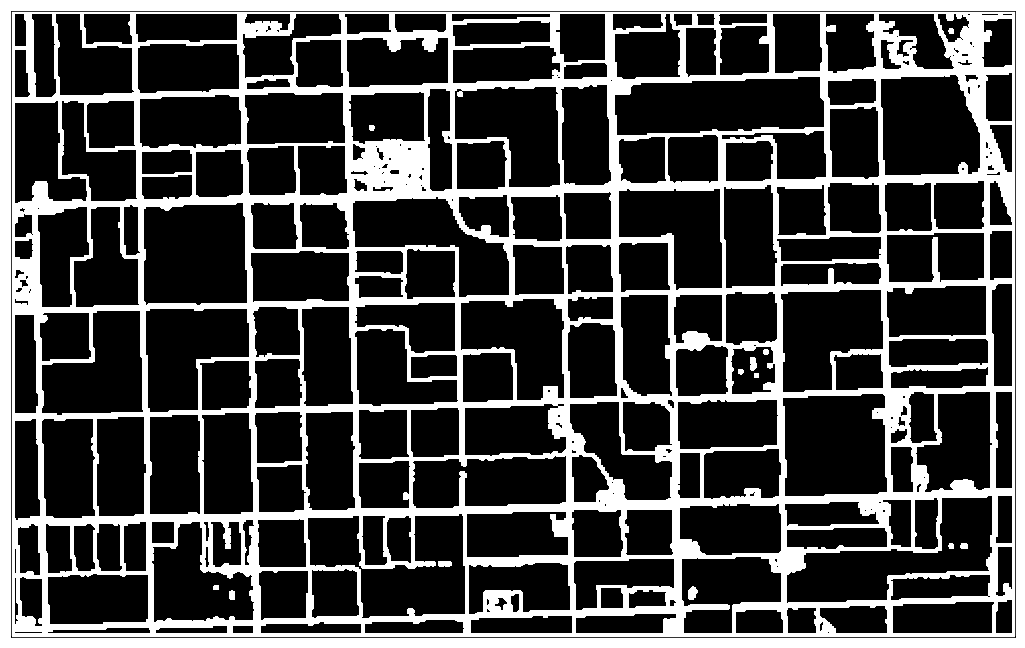

In [25]:
show_edges(edges)

In [260]:
# binarize true edges
y_true = edges > 0

# Sobel

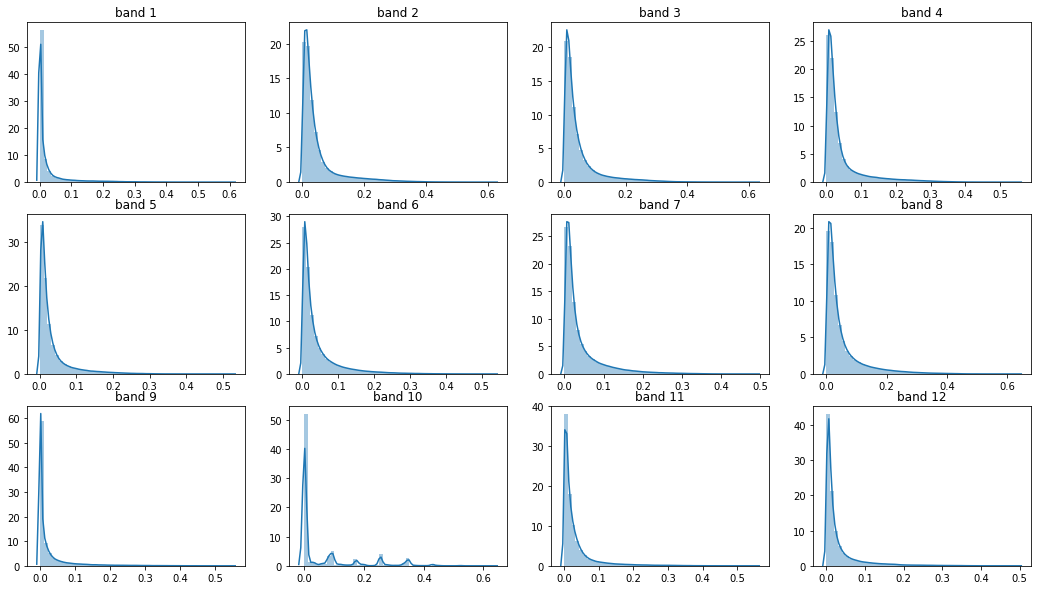

In [249]:
plt.figure(figsize=(18,10))
for i, band in enumerate(bands):
    plt.subplot(3,4,i+1)
    sns.distplot(sobel(band).flatten())
    plt.title('band '+str(i+1))

In [291]:
fscores = []
psnrs = []
thresholds = []
hausdorffs = []

for sigma in tqdm(range(7)):
    band = gaussian(band_08, sigma) 
    edge_map = sobel(band)

    fscore = []
    psnr = []
    hausdorff = []
    threshold = np.arange(edge_map.min(), edge_map.max()-0.01, (edge_map.max()-edge_map.min())/50)

    for thr in threshold:
        y_pred = edge_map > thr
        fscore.append(f1_score(y_true.flatten(), y_pred.flatten()))
        psnr.append(compare_psnr(y_true, y_pred))
        hausdorff.append(directed_hausdorff(y_true, y_pred)[0])
    psnrs.append(psnr)
    fscores.append(fscore)
    thresholds.append(threshold)
    hausdorffs.append(hausdorff)

100%|██████████| 7/7 [01:48<00:00, 15.54s/it]


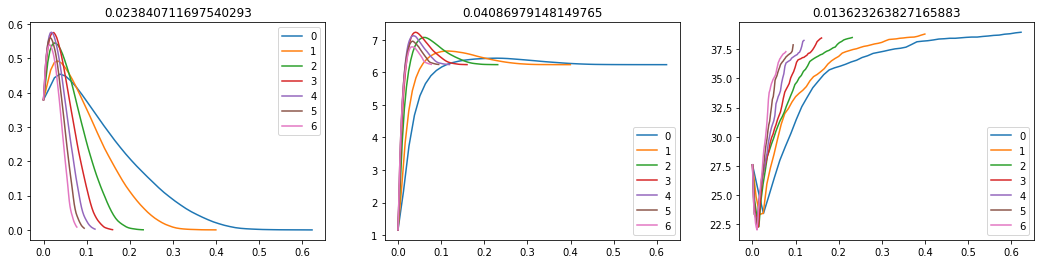

In [292]:
plt.figure(figsize=(18,4))
for j, scores in enumerate([fscores, psnrs, hausdorffs]):
    plt.subplot(1,3,j+1)
    for i, (threshold, score) in enumerate(zip(thresholds, scores)):
        plt.plot(threshold, score, label=str(i))
    plt.legend()
    if j < 2:
        plt.title(thresholds[3][np.argmax(scores[3])])
    else:
        plt.title(thresholds[3][np.argmin(scores[3])])
plt.show()

# Prewitt

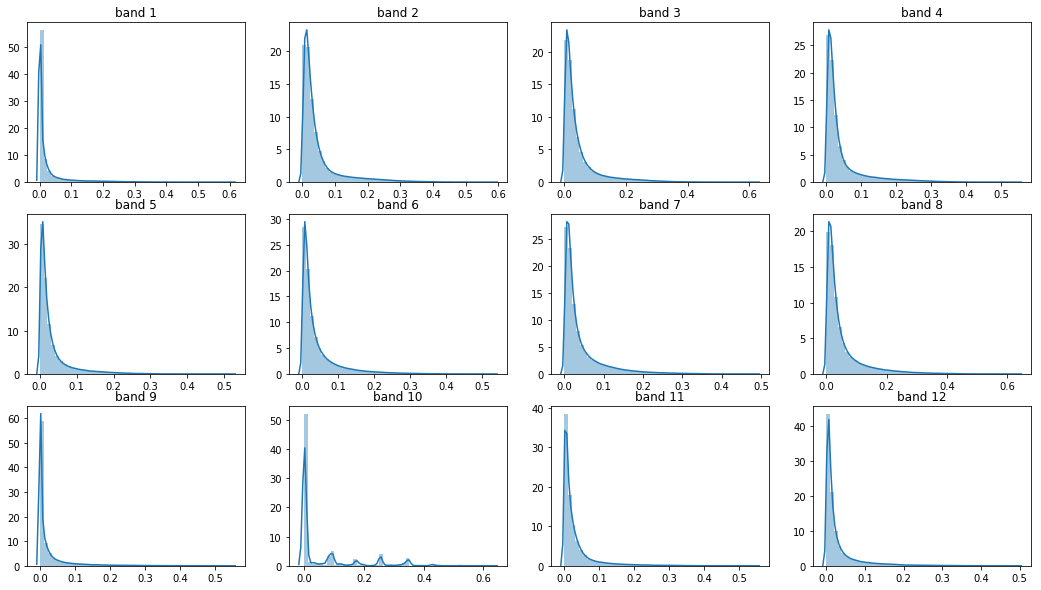

In [293]:
plt.figure(figsize=(18,10))
for i, band in enumerate(bands):
    plt.subplot(3,4,i+1)
    sns.distplot(prewitt(band).flatten())
    plt.title('band '+str(i+1))

In [277]:
fscores = []
psnrs = []
thresholds = []
hausdorffs = []

for sigma in tqdm(range(7)):
    band = gaussian(band_08, sigma) 
    edge_map = prewitt(band)

    fscore = []
    psnr = []
    hausdorff = []
    threshold = np.arange(edge_map.min(), edge_map.max()-0.01, (edge_map.max()-edge_map.min())/50)

    for thr in threshold:
        y_pred = edge_map > thr
        fscore.append(f1_score(y_true.flatten(), y_pred.flatten()))
        psnr.append(compare_psnr(y_true, y_pred))
        hausdorff.append(directed_hausdorff(y_true, y_pred)[0])
    psnrs.append(psnr)
    fscores.append(fscore)
    thresholds.append(threshold)
    hausdorffs.append(hausdorff)

100%|██████████| 7/7 [01:47<00:00, 15.38s/it]


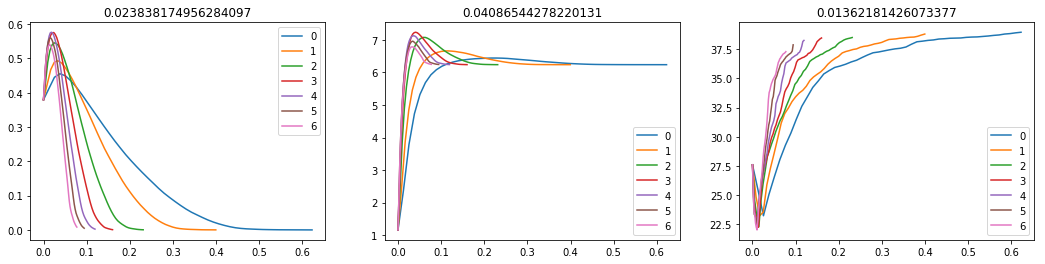

In [290]:
plt.figure(figsize=(18,4))
for j, scores in enumerate([fscores, psnrs, hausdorffs]):
    plt.subplot(1,3,j+1)
    for i, (threshold, score) in enumerate(zip(thresholds, scores)):
        plt.plot(threshold, score, label=str(i))
    plt.legend()
    if j < 2:
        plt.title(thresholds[3][np.argmax(scores[3])])
    else:
        plt.title(thresholds[3][np.argmin(scores[3])])
plt.show()